# Bike Sharing Demand 캐글 과제 (심플한 분석과 예측)
"https://www.kaggle.com/liyapranay/eda-to-forecasting-keeping-it-simple"

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv('../kaggle/bike/train.csv')
test = pd.read_csv('../kaggle/bike/train.csv')

In [47]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      108

(None, None)

* Casual, registered 컬럼은 test set에 없으므로 삭제합니다.

In [48]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [49]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


## 현재의 데이터 열을 머신러닝에 친화적인 형식으로 바꾸기

In [50]:
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['month'] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['day'] = [t.day for t in pd.DatetimeIndex(train.datetime)]
train['hour'] = [t.hour for t in pd.DatetimeIndex(train.datetime)]

In [51]:
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['month'] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['day'] = [t.day for t in pd.DatetimeIndex(test.datetime)]
test['hour'] = [t.hour for t in pd.DatetimeIndex(test.datetime)]

In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## 위의 출력으로 원래 있던 datetime 열을 머신러닝에 맞게 변환한 것이 확인 되어 기존 datetime열을 삭제해줍니다.

In [53]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [54]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


# 데이터 시각화하기 

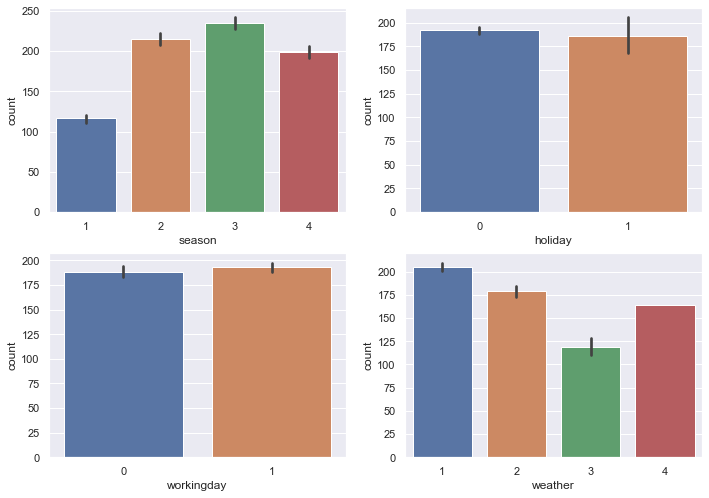

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

fig, ax = plt.subplots(2,2)

#계절과 count
sns.barplot(train['season'],train['count'],ax=ax[0,0]);

#휴일 여부와 count
sns.barplot(train['holiday'],train['count'],ax=ax[0,1]);

#작업일 여부와 count
sns.barplot(train['workingday'],train['count'],ax=ax[1,0]);

#날씨와 count
sns.barplot(train['weather'],train['count'],ax=ax[1,1]);

* 처음 import한 데이터 셋에서 head()를 하였을 때 1월1일의 season column은 1은 즉 봄을 가르킴
* season 1= 봄 , season 2= 여름 , season 3= 가을 , season 4= 겨울
* 1월은 겨울이기 때문에 날씨에 맞춰서 season 컬럼 정리할 필요가 있음 

In [56]:
# 날씨에 맞춘 seson_change 함수 만들기

def seson_change(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

train['season'] = train.month.apply(seson_change)

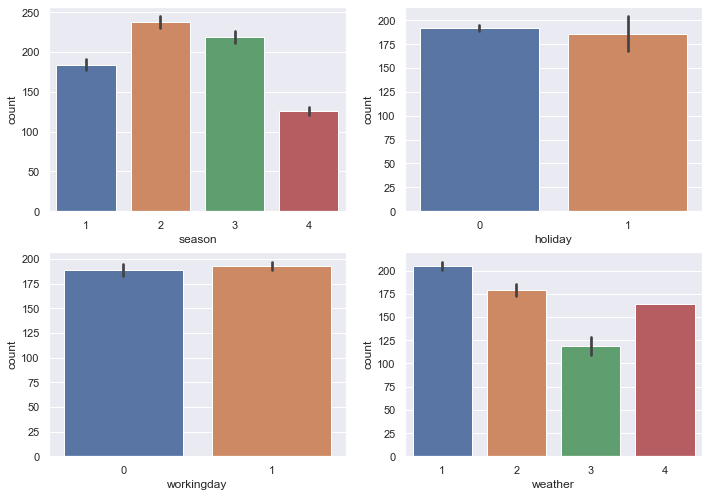

In [57]:
#seson 수정한 값으로 다시 표기하기 
figure = plt.figure(figsize = (11.7,8.27))

ax1 = plt.subplot(2,2,1)
ax1 = sns.barplot(x = 'season', y='count', data=train)

ax2 = plt.subplot(2,2,2)
ax2 = sns.barplot(x = 'holiday', y='count', data=train )

ax3 = plt.subplot(2,2,3)
ax3 = sns.barplot(x = 'workingday', y='count', data=train )

ax4 = plt.subplot(2,2,4)
ax4 = sns.barplot(x = 'weather', y='count', data=train )

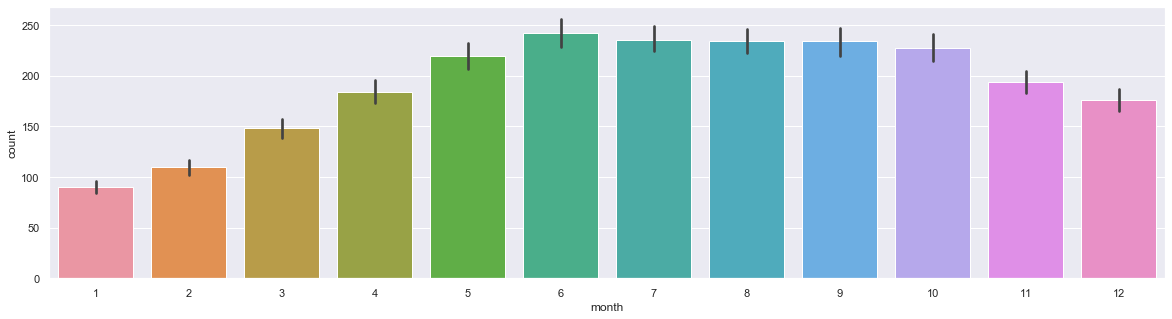

In [58]:
#월별 자전거 수요 
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=train['month'],y=train['count']);

* 위의 플롯으로 계절 , 휴일 , 작업일 , 날씨에 따른 COUNT와 더불어 월별 자전거 수요도 직관적으로 보여짐 

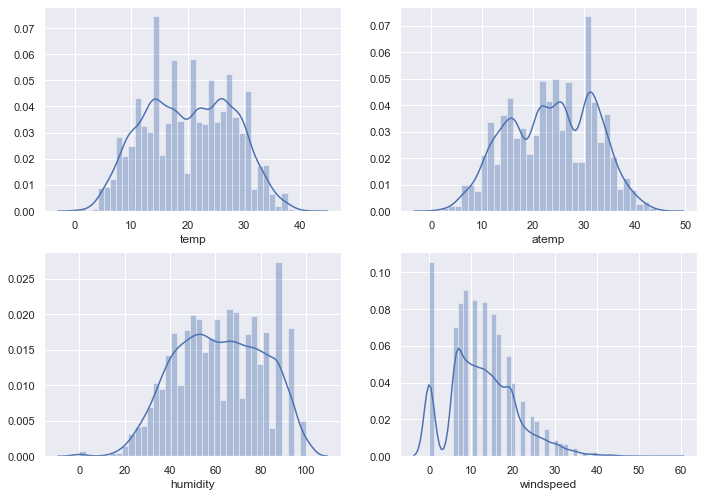

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

fig, ax = plt.subplots(2,2)

#온도와 count
sns.distplot(train['temp'],ax=ax[0,0]);

#평균온도와 count
sns.distplot(train['atemp'],ax=ax[0,1]);

#습도와 count
sns.distplot(train['humidity'],ax=ax[1,0]);

#바람속도와 count
sns.distplot(train['windspeed'],ax=ax[1,1]);

* 온도 ,평균온도 ,습도 , 바람속도에 따른 CONUT 비교  

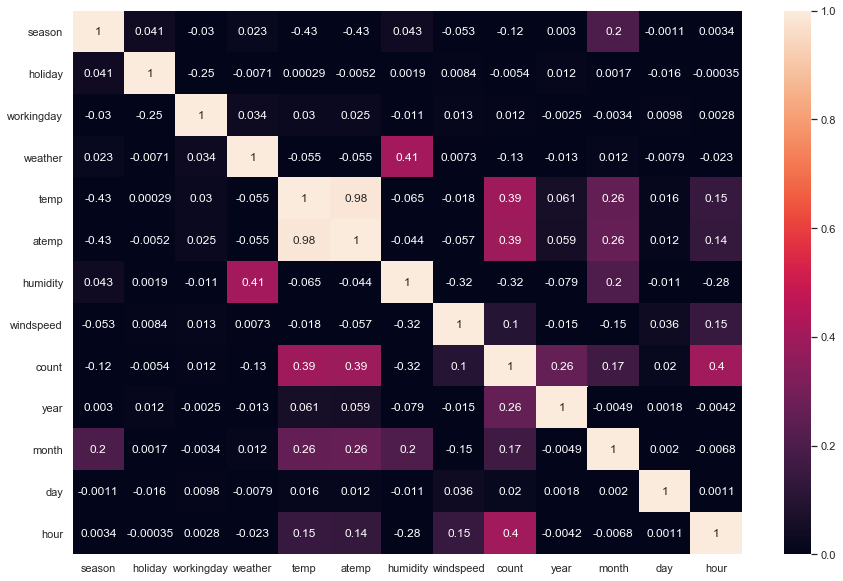

In [60]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train.corr(), annot=True,vmin =0)

### 각각의 컬럼들 간의 상관계수가 높을 수록 색깔이 밝아지는 히트맵으로 상관계수 파악 

### 계절과 날씨 컬럼 데이터 변환 

In [62]:
season = pd.get_dummies(train['season'],prefix='season')
train = pd.concat([train,season],axis=1)

In [63]:
train.drop('season',axis=1,inplace=True)
train.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,season_1,season_2,season_3,season_4
0,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,0,0,0,1
1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,0,0,0,1
2,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,0,0,0,1
3,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,0,0,0,1
4,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,0,0,0,1


In [64]:
weather = pd.get_dummies(train['weather'],prefix='weather')

train = pd.concat([train,weather],axis=1)

train.drop('weather',axis=1,inplace=True)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,16,2011,1,1,0,0,0,0,1,1,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,1,1,1,0,0,0,1,1,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2011,1,1,2,0,0,0,1,1,0,0,0
3,0,0,9.84,14.395,75,0.0,13,2011,1,1,3,0,0,0,1,1,0,0,0
4,0,0,9.84,14.395,75,0.0,1,2011,1,1,4,0,0,0,1,1,0,0,0


# 머신러닝 모델 만들기

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [66]:
X = train.drop('count',axis=1)
y = train['count']
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_pred_rf))

0.3428958010097943

### 위에 보이는 랜덤 포레스트 모델은 RMSLE의 기본 파라미터를 사용하고 있음
### 아래에 나열된 파라미터들을 하이퍼 파라미터로 조정할 것

In [69]:
n_estimators = [int(x) for x in range(200,2000,100)]
max_feature = ['auto','sqrt']
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
max_depth = [int(x) for x in range(10,110,11)]
max_depth.append(None)

In [70]:
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_feature,
              'min_samples_leaf': min_sample_leaf,
              'min_samples_split': min_sample_split}

In [71]:
random_grid

{'n_estimators': [200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 109, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

### 이제 RandomizedSearchCV를 사용하여 최적의 솔루션을 찾을 것

In [72]:
rf_tune = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_tune,param_distributions=random_grid,n_iter=100,cv=5,verbose= 2,n_jobs=-1)

## rf_random(X_train,y_train)을 실행함으로써 우리는 아래와 같은 최적 파라미터를 얻을 것

* max_depth=87
* max_features='auto'
* min_samples_leaf=1
* min_samples_split=2
* n_estimators=1300


## 이제 하이퍼 파라미터로 최종 랜덤 포레스트 모델을 만들 것

In [74]:
final_rf = RandomForestRegressor(max_depth=87,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1300)
final_model_rf = final_rf.fit(X_train,y_train)
y_final_pred = final_model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_final_pred))

0.34196659561097265